# Midterm - Question 1
- Perform Analysis on Enron dataset

In [24]:
from email.parser import Parser                     #Import email parser to read the emails
import email                                        
import os                                           #Import OS module to use os.walk functionality
import requests
import json,re,datetime
import shutil                                       #Import shutil to copy data from one directory to other
from datetime import datetime                      #Import datetime 
import matplotlib.pyplot as plt                    #Import matplotlib to plot graphs
import pylab as pl

- Creating a new directory in 'month - year' format and storing Enron data in that folder structure.

In [3]:
def create_dir(path_to_folder):  
    if not os.path.exists(path_to_folder): 
        os.makedirs(path_to_folder)

In [4]:
path_to_data=r'C:/Users/Anurag/Desktop/python/midterm/Question1/maildir'      #Define path for enron dataset
path_to_folder=r'C:/Users/Anurag/Desktop/python/midterm/Question1/Enron_mails'    #Define path to create new directory

for root, dirs, files in os.walk(path_to_data):                #Walk directory to get root,directories and files
    for d in dirs:                                             #Iterate through diretories
        path=os.path.join(path_to_data+'/'+d)                  #join directory name to the current path
        for root,dirs,files in os.walk(path):                  #walk through new path to get the new root, directories and files
            for di in dirs:
                if di=='_sent_mail' or di.startswith('sent'):  #Check if the files startswith key word sent or _Sent
                    path=os.path.join(path+'/'+di)             #If yes, Join the name to the current path
                #print('path',path)
                    for root,dirs,files in os.walk(path):      #repeat previous steps to get root, directories and files
                        for file in files:                     #Iterate through all files
                        
                                                #print('File',file)
                            path1=os.path.join(path+'/'+file+'.')
                        #print('file',path1)
                            with open(path1,'r',encoding='utf-8',errors='ignore') as root:   #Open file in 'read' mode
                                data=root.read()                                             #read content of the files and store them in variable named 'data'
                            email1=Parser().parsestr(data)                       #Parse the content of 'data' and store the information in 'email1' variable
                            foo = email1['Date'][:31].strip()                    #Change the date format
                            #print('Time',foo)
                            datetime_object = datetime.strptime(foo, "%a, %d %b %Y %H:%M:%S %z")
                            #print('Month: ',datetime_object.month)
                            #print('Year: ',datetime_object.year)
                            monthYear=(str(datetime_object.month))+"-"+(str(datetime_object.year))
                            path3=os.path.join(path_to_folder+"/"+monthYear)
                            create_dir(path3)
                        #print('Path1',path1)
                        #print('Path3',path3)
                            shutil.copy(path1,path3)

In [30]:
analysis_path=r'C:\Users\Anurag\Desktop\python\midterm\Question1\Enron_mails'
list_count={}
my_list=['meeting','attach','email','thank','inform','receive','file']
for root, dirs, files in os.walk(analysis_path):
    for d in dirs:
        path=os.path.join(analysis_path+'/'+d)
        for root,dirs,files in os.walk(path):
            #if d.endswith('1999'):
            for file in files:
                path1=os.path.join(path+'/'+file)
                with open(path1,'r',encoding='utf-8',errors='ignore') as root:
                    file_data=root.read()
                list_email=Parser().parsestr(file_data)
                list_read=list_email.get_payload()
                list_lower_words=list_read.lower()                             #Convert the content to lower case
                list_words = list_lower_words.split()                               #Split() function separates the words with whitespace and add it to the words list
                for word in list_words:
                    if word in my_list:
                        foo = list_email['Date'][:31].strip()                    #Change the date format
                        datetime_object = datetime.strptime(foo, "%a, %d %b %Y %H:%M:%S %z")
                        monthYear=(str(datetime_object.month))+"-"+(str(datetime_object.year))#Checking if the word is an alphabet
                        if monthYear not in list_count:
                            list_count[monthYear] = 1                         #If words doen't exist assign it a value 1
                        else:
                            list_count[monthYear] += 1 
print('x:',list_count)
sorted_list=sorted(list_count.items(), key=lambda x: x[1])   #Use of lambda function to sort the words in descending order of their frequency
print('z:',sorted_list)

x: {'1-1999': 57, '1-2000': 381, '1-2001': 1272, '1-2002': 379, '10-1998': 1, '10-1999': 112, '10-2000': 997, '10-2001': 601, '11-1998': 14, '11-1999': 76, '11-2000': 784, '11-2001': 809, '12-1998': 14, '12-1999': 213, '12-2000': 955, '12-2001': 335, '2-1999': 26, '2-2000': 443, '2-2001': 1181, '2-2002': 236, '3-1999': 15, '3-2000': 523, '3-2001': 1184, '3-2002': 234, '4-1999': 9, '4-2000': 388, '4-2001': 1284, '4-2002': 68, '5-1999': 44, '5-2000': 501, '5-2001': 1185, '5-2002': 36, '6-1999': 57, '6-2000': 515, '6-2001': 627, '6-2002': 60, '7-1999': 74, '7-2000': 653, '7-2001': 543, '7-2002': 2, '8-1999': 89, '8-2000': 748, '8-2001': 570, '9-1999': 182, '9-2000': 595, '9-2001': 344}
z: [('10-1998', 1), ('7-2002', 2), ('4-1999', 9), ('11-1998', 14), ('12-1998', 14), ('3-1999', 15), ('2-1999', 26), ('5-2002', 36), ('5-1999', 44), ('1-1999', 57), ('6-1999', 57), ('6-2002', 60), ('4-2002', 68), ('7-1999', 74), ('11-1999', 76), ('8-1999', 89), ('10-1999', 112), ('9-1999', 182), ('12-1999', 

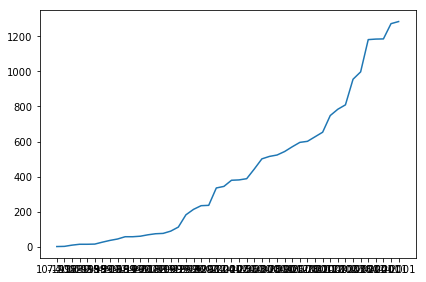

In [35]:
list_monthyear=[]
list_monthyear_count=[]
for words in sorted_list:
    list_monthyear.append(words[0])
        
for values in sorted_list:
    list_monthyear_count.append(values[1])


pl.figure(1)   
x= range(46)
pl.xticks(x,list_monthyear)
pl.plot(x,list_monthyear_count)
pl.tight_layout(True)
#print('month',len(list_monthyear),'/n','count',len(list_monthyear_count))
#plt.loglog(z,list_monthyear_count)
plt.show()

In [5]:
analysis_path=r'C:\Users\Anurag\Desktop\python\midterm\Question1\Enron_mails'
frequency_1999={}
my_list=['reward','gift']
for root, dirs, files in os.walk(analysis_path):
    for d in dirs:
        path=os.path.join(analysis_path+'/'+d)
        for root,dirs,files in os.walk(path):
            if d.endswith('1999'):
                for file in files:
                    path1=os.path.join(path+'/'+file)
                    with open(path1,'r',encoding='utf-8',errors='ignore') as root:
                        data_1999=root.read()
                    email_1999=Parser().parsestr(data_1999)
                    read_file=email_1999.get_payload()
                    lower_words=read_file.lower()                             #Convert the content to lower case
                    words = lower_words.split()                               #Split() function separates the words with whitespace and add it to the words list
                    for word in words:
                        if word in my_list:                                        #Checking if the word is an alphabet
                            gift_from=email_1999['From']
                            gift_to=email_1999['To']
                            mail_content=email_1999.get_payload()
                            if word not in frequency_1999:                       #Checking if the word already exist in the dictionary
                                frequency_1999[word] = 1                         #If words doen't exist assign it a value 1
                            else:
                                frequency_1999[word] += 1 
print('x:',frequency_1999)
sorted_words_1999=sorted(frequency_1999.items(), key=lambda x: x[1], reverse=True)   #Use of lambda function to sort the words in descending order of their frequency
print('z:',sorted_words_1999)  


x: {'reward': 4, 'gift': 32}
z: [('gift', 32), ('reward', 4)]


In [6]:
frequency_2000={}
my_list=['reward','gift']
for root, dirs, files in os.walk(analysis_path):
    for d in dirs:
        path=os.path.join(analysis_path+'/'+d)
        for root,dirs,files in os.walk(path):
            if d.endswith('2000'):
                for file in files:
                    path1=os.path.join(path+'/'+file)
                    with open(path1,'r',encoding='utf-8',errors='ignore') as root:
                        data_1999=root.read()
                    email_1999=Parser().parsestr(data_1999)
                    read_file=email_1999.get_payload()
                    lower_words=read_file.lower()                             #Convert the content to lower case
                    words = lower_words.split()                               #Split() function separates the words with whitespace and add it to the words list
                    for word in words:
                        if word in my_list:                                        #Checking if the word is an alphabet
                            if word not in frequency_2000:                       #Checking if the word already exist in the dictionary
                                frequency_2000[word] = 1                         #If words doen't exist assign it a value 1
                            else:
                                frequency_2000[word] += 1 
print('y:',frequency_2000)
sorted_words2000=sorted(frequency_2000.items(), key=lambda x: x[1], reverse=True)   #Use of lambda function to sort the words in descending order of their frequency
print('z:',sorted_words2000) 

y: {'gift': 71, 'reward': 14}
z: [('gift', 71), ('reward', 14)]


In [7]:
frequency_2001={}
my_list=['reward','gift','received','thank']
for root, dirs, files in os.walk(analysis_path):
    for d in dirs:
        path=os.path.join(analysis_path+'/'+d)
        for root,dirs,files in os.walk(path):
            if d.endswith('2001'):
                for file in files:
                    path1=os.path.join(path+'/'+file)
                    with open(path1,'r',encoding='utf-8',errors='ignore') as root:
                        data_1999=root.read()
                    email_1999=Parser().parsestr(data_1999)
                    read_file=email_1999.get_payload()
                    lower_words=read_file.lower()                             #Convert the content to lower case
                    words = lower_words.split()                               #Split() function separates the words with whitespace and add it to the words list
                    for word in words:
                        if word in my_list:                                        #Checking if the word is an alphabet
                            if word not in frequency_2001:                       #Checking if the word already exist in the dictionary
                                frequency_2001[word] = 1                         #If words doen't exist assign it a value 1
                            else:
                                frequency_2001[word] += 1 
print('y:',frequency_2001)
sorted_words2001=sorted(frequency_2001.items(), key=lambda x: x[1], reverse=True)   #Use of lambda function to sort the words in descending order of their frequency
print('z:',sorted_words2001)

y: {'received': 1896, 'thank': 2079, 'gift': 101, 'reward': 18}
z: [('thank', 2079), ('received', 1896), ('gift', 101), ('reward', 18)]


In [253]:
frequency_2002={}
my_list=['reward','gift','received','thank']
for root, dirs, files in os.walk(analysis_path):
    for d in dirs:
        path=os.path.join(analysis_path+'/'+d)
        for root,dirs,files in os.walk(path):
            if d.endswith('2002'):
                for file in files:
                    path1=os.path.join(path+'/'+file)
                    with open(path1,'r',encoding='utf-8',errors='ignore') as root:
                        data_1999=root.read()
                    email_1999=Parser().parsestr(data_1999)
                    read_file=email_1999.get_payload()
                    lower_words=read_file.lower()                             #Convert the content to lower case
                    words = lower_words.split()                               #Split() function separates the words with whitespace and add it to the words list
                    for word in words:
                        if word in my_list:                                        #Checking if the word is an alphabet
                            if word not in frequency_2002:                       #Checking if the word already exist in the dictionary
                                frequency_2002[word] = 1                         #If words doen't exist assign it a value 1
                            else:
                                frequency_2002[word] += 1 
print('y:',frequency_2002)

y: {'received': 126, 'thank': 283, 'gift': 8}


list [4, 32]
2list: [71, 14]


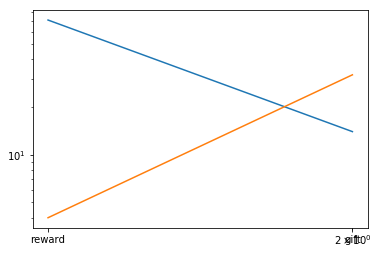

In [289]:
word_1999=[]
frequency_list_1999=[]
for words in frequency_1999.keys():
    if words not in word_1999: 
        word_1999.append(words)
        
for values in frequency_1999.values():
    if values not in frequency_list_1999:
        frequency_list_1999.append(values)

print('list',frequency_list_1999)
word_2000=[]
frequency_list_2000=[]
for words in frequency_2000.keys():
    if words not in word_2000: 
        word_2000.append(words)
        
for values in frequency_2000.values():
    if values not in frequency_list_2000:
        frequency_list_2000.append(values)
print('2list:',frequency_list_2000)

#ax=plt.subplot(111)
z1=[1,2]
z2=[1,2]
bar_width=2
plt.loglog(z1,frequency_list_2000)
plt.loglog(z1,frequency_list_1999)
plt.xticks(z1,word_2000)
plt.xticks(z1,word_1999)
plt.show()

In [ ]:
z=[1,2,3]
plt.xticks(z,word)
plt.plot(z,frequency_list)
plt.show()

In [ ]:
for root, dirs, files in os.walk(path_to_data):
    for directory in dirs:
        path=os.path.join(path_to_data+'/'+directory)
        print('path 1:',path)
    for file in files:
        print('Directory:',directory)
        path=os.path.join(path +'/' + file+'.')
        print('path:',path)
        with open(path,'r',encoding='utf-8') as root:
            data=root.read()
        email1=Parser().parsestr(data)
        "%A, %d. %B %Y %I:%M%p"
        month=(email1['Date'][8:11])
        year=(email1['Date'][12:16])
        monthYear=month+"-"+year
        path=os.path.join(path_to_folder+"/"+monthYear)
            #shutil.move()
        create_dir(path)

In [115]:
def create_dir(path_to_folder):  
    if not os.path.exists(path_to_folder): 
        os.makedirs(path_to_folder)

In [ ]:
#match=re.search(r'\d{2}-\d{3}-\d{4}',email1['Date'])
#datei=datetime.datetime.strptime(match.group(),'%d-%m-%y').date()

type(email1['Date'])

print(email1['Date'])
print(month)
print(year)

print(monthYear)

In [ ]:
import os

startpath="C:\\Users\\Anurag\\Desktop\\python\\maildir\\"
for root, dirs, files in os.walk(startpath):
    level = root.replace(startpath, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print('{}{}'.format(subindent, f))
            


/
allen-p/
    all_documents/
        1
        10
        100
        101
        102
        103
        104
        105
        106
        107
        108
        109
        11
        110
        111
        112
        113
        114
        115
        116
        117
        118
        119
        120
        121
        122
        123
        124
        125
        126
        127
        128
        129
        130
        131
        132
        133
        134
        135
        136
        137
        138
        139
        14
        140
        141
        142
        143
        144
        145
        146
        147
        148
        149
        15
        150
        151
        152
        153
        154
        155
        156
        157
        158
        159
        16
        160
        161
        162
        163
        164
        165
        166
        167
        168
        169
        17
        170
        171
        172
        173
      

In [62]:
FbDict=[]

def main():        

    for root, dirs, files in os.walk(os.getcwd()): 
        for f in files:
            f = os.path.join(root, f)
            with open(f, 'r') as f: data=f.read()
            emaildata = parser().parsestr(data)                      
            print(emaildata['date']) 
            f.close()

[]

In [61]:
main()

AttributeError: 'str' object has no attribute 'decode'

In [30]:
pth = r'C:\Users\Anurag\Desktop\python\maildir'
def getCats(pth):
    cats = []
    subcats = []
    for (dirpath, dirnames, filenames) in os.walk(pth):
        #print dirpath+"\n\t", "\n\t".join(dirnames), "\n%d files"%(len(filenames))
        if dirpath == pth:
            cats = dirnames
        else:
            subcats.extend(dirnames)
            dirnames[:]=[] # don't walk any further downwards
    # subcats = list(set(subcats)) # uncomment this if you want 'subcats' to be unique
    return (cats, subcats)
getCats(pth)

(['allen-p',
  'arnold-j',
  'arora-h',
  'badeer-r',
  'bailey-s',
  'bass-e',
  'baughman-d',
  'beck-s',
  'benson-r',
  'blair-l',
  'brawner-s',
  'buy-r',
  'campbell-l',
  'carson-m',
  'cash-m',
  'causholli-m',
  'corman-s',
  'crandell-s',
  'cuilla-m',
  'dasovich-j',
  'davis-d',
  'dean-c',
  'delainey-d',
  'derrick-j',
  'dickson-s',
  'donoho-l',
  'donohoe-t',
  'dorland-c',
  'ermis-f',
  'farmer-d',
  'fischer-m',
  'forney-j',
  'fossum-d',
  'gang-l',
  'gay-r',
  'geaccone-t',
  'germany-c',
  'gilbertsmith-d',
  'giron-d',
  'griffith-j',
  'grigsby-m',
  'guzman-m',
  'haedicke-m',
  'hain-m',
  'harris-s',
  'hayslett-r',
  'heard-m',
  'hendrickson-s',
  'hernandez-j',
  'hodge-j',
  'holst-k',
  'horton-s',
  'hyatt-k',
  'hyvl-d',
  'jones-t',
  'kaminski-v',
  'kean-s',
  'keavey-p',
  'keiser-k',
  'king-j',
  'kitchen-l',
  'kuykendall-t',
  'lavorato-j',
  'lay-k',
  'lenhart-m',
  'lewis-a',
  'linder-e',
  'lokay-m',
  'lokey-t',
  'love-p',
  'lucci-p

In [ ]:
                if isinstance(v, dict):                                                                
                    try:
                        dataFormat = {"created_at":v['data'][0]['created_time'],"user":v['data'][0]['from']['id'],
                                       "id":v['data'][0]['id'],"name":v['data'][0]['from']['name'],"text":v['data'][0]['message']}                                        
                        if dataFormat not in FbDict:
                            FbDict.append(json.dumps(dataFormat, separators=(',',':')))                          
                        else:
                            continue              
                    except KeyError:
                        continue